<a href="https://colab.research.google.com/github/space-owner/Tensorflow-2/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Convolutional Neural Network***
- 해당 게시물은 **```Tensorflow-2```** 학습을 위해 **```Tutorial```**을 바탕으로 작성되었어요.
- 자세한 내용은 해당 **```Link```**를 통해 확인하실 수 있어요. [바로가기](https://www.tensorflow.org/)

- 우리는 먼저 필요한 ```Library```를 불러올거에요.
    - **```numpy```** : 간편하게 백터를 다룰 수 있어요.
    - **```tensorflow```** : 데이터 로드와 간단한 전처리에 필요해요.
    - **```keras```** : 모델 네트워크를 구성할거에요.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

- **tensorflow.keras.datasets** 에서 제공하는 **```cifar10```** 데이터를 불러올게요.
     - **```(훈련 이미지, 훈련 레이블)```**, **```(테스트 이미지, 테스트 레이블)```** 구성을 확인하실 수 있어요.
- 이미지는 **R, G, B** 로 구성되어 있으므로 **```255```** 사이의 숫자로 정규화를 해줄게요.
- 훈련 데이터는 **```50,000```** 개가 있네요. 그리고 테스트 데이터는 **```10,000```** 개 레이블은 **```0```** ~ **``` 9```** 까지의 수로 이루어져 있어요.


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print("train size: {} \ntest size:{}".format(
        train_images.shape, test_images.shape)
)

train_images, test_images = train_images/255.0, test_images/255.0
print("train label names:", set(train_labels.reshape(-1)))

train size: (50000, 32, 32, 3) 
test size:(10000, 32, 32, 3)
train label names: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("class name:", class_names)

class name: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


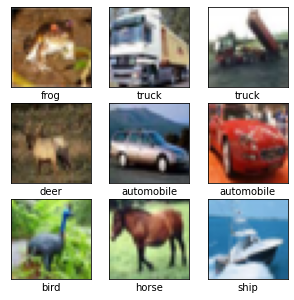

In [ ]:
plt.figure(figsize=(5, 5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()

model.add(
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
)
model.add(
    layers.MaxPool2D(pool_size=(2, 2))
)
model.add(
    layers.Conv2D(64, (3, 3), activation='relu')
)
model.add(
    layers.MaxPool2D(pool_size=(2, 2))
)
model.add(
    layers.Conv2D(64, (3, 3), activation='relu')
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(
    layers.Flatten()
)
model.add(
    layers.Dense(64, activation='relu')
)
model.add(
    layers.Dense(10)
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

epoch_size = 10

history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=epoch_size
)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5165 - accuracy: 0.4480 - val_loss: 1.2453 - val_accuracy: 0.5535
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1552 - accuracy: 0.5908 - val_loss: 1.1216 - val_accuracy: 0.6021
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0022 - accuracy: 0.6504 - val_loss: 0.9962 - val_accuracy: 0.6520
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9031 - accuracy: 0.6822 - val_loss: 0.9326 - val_accuracy: 0.6768
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8341 - accuracy: 0.7083 - val_loss: 0.9349 - val_accuracy: 0.6831
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7713 - accuracy: 0.7296 - val_loss: 0.8895 - val_accuracy: 0.6950
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7236 - accuracy: 0.7454 - val_loss: 0.9092 - val_ac

In [ ]:
print("history:", history.history.keys())

history: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


313/313 - 1s - loss: 0.9272 - accuracy: 0.6980
test loss: 0.9271950125694275 
test acc: 0.6980000138282776


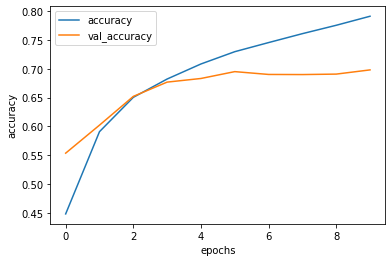

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

test_loss, test_acc = model.evaluate(
    test_images, test_labels, verbose=2
)
print("test loss: {} \ntest acc: {}".format(
        test_loss, test_acc)
)